<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

Ce notebook est la suite de celui sur le traitement des descriptions. On récupère les données nettoyées pour les catégories des produits.

## Imports

In [1]:
# Chargement des librairies
# Standard
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from matplotlib.image import imread
from PIL import Image as PilImage

# Deep Learning - TensorFlow/Keras
os.environ["KERAS_BACKEND"] = "torch"
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inceptionresnetv2
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet201
from tensorflow.keras.utils import to_categorical

# Custom Modules
from Deveau_Estelle_4_IMG_func_042024 import *

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_txt_faisabilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'Deveau_Estelle_3_notebook_img_faisabilite_042024.ipynb',
 'Deveau_Estelle_4_IMG_func_042024.py',
 'Deveau_Estelle_5_notebook_img_classification_042024.ipynb',
 'model_best.keras',
 'model_best.weights.h5',
 'model_densenet201_best.weights.h5',
 'model_inceptionresnetv2_best.weights.h5',
 'model_vgg16_best.weights.h5',
 'OC_projet6.pptx',
 'pythonProject',
 'svg',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'Weather_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/Cleaned/")

['data.csv']

In [4]:
path     = "./data/Cleaned/"
filename = "data.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
path     = "./data/Sources/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


# Classification supervisée

In [7]:
cols_to_keep = ['uniq_id', 'product_category']
df = data[cols_to_keep]
df.head(5)

,uniq_id,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing


In [8]:
image_paths = [f"{path}{uid}.jpg" for uid in df['uniq_id']]

# Encodage des catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(df['product_category'])
category_names = label_encoder.classes_

## Séparation des jeux de données (train, val, test)

In [9]:
y = to_categorical(categories_encoded, 7)

In [10]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
# Diviser les chemins d'image et les étiquettes
paths_train, paths_test, y_train, y_test = train_test_split(image_paths, y, test_size=0.2, random_state=42)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.25, random_state=42)

In [12]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

## Evaluation des modèles sélectionnés

In [14]:
# Définir le seuil à un niveau supérieur spécifique
PilImage.MAX_IMAGE_PIXELS = 100000000

### VGG16

In [15]:
# Préparation des données
X_train_vgg16, X_val_vgg16, X_test_vgg16 = prepare_data(paths_train, paths_val, paths_test, preprocess_vgg16,
                                                        target_size=(224, 224, 3))

In [16]:
# Création du modèle
model_vgg16 = create_model_fct(base_model_name='VGG16')

In [17]:
# Entraînement du modèle
model_vgg16, history_vgg16, duration_vgg16 = train_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16, y_val,
                                                         model_save_path="./model_vgg16_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3348 - loss: 6.4097
Epoch 1: val_loss improved from inf to 1.66365, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3396 - loss: 6.3387 - val_accuracy: 0.7048 - val_loss: 1.6636
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6913 - loss: 2.0158
Epoch 2: val_loss improved from 1.66365 to 1.41563, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.6918 - loss: 2.0082 - val_accuracy: 0.7476 - val_loss: 1.4156
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7506 - loss: 1.2111
Epoch 3: val_loss did not improve from 1.41563
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7508 - loss: 1.2148 - val_accuracy: 0.7190 - val_loss: 1.4236
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7378 - loss: 1.3272
Epoch 4: val_loss improved from 1.41563 to 1.13911, saving model t

In [18]:
# Évaluation du modèle
loss_vgg16, accuracy_vgg16, ari_score_vgg16 = evaluate_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16,
                                                             y_val, X_test_vgg16, y_test, best_weights_path="./model_vgg16_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 1.0000 - loss: 0.0050
Training Accuracy after last epoch: 1.0000

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8469 - loss: 0.8732
Test Accuracy after last epoch: 0.8333

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8221 - loss: 0.9300
Validation Accuracy (best): 0.8190
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8257 - loss: 0.8142
Test Accuracy (best): 0.8190
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
Adjusted Rand Index (ARI): 0.6400


### InceptionResNetV2

In [19]:
# Préparation des données
X_train_inceptionresnetv2, X_val_inceptionresnetv2, X_test_inceptionresnetv2 = prepare_data(paths_train, paths_val,
                                                                                            paths_test, preprocess_inceptionresnetv2,
                                                                                            target_size=(299, 299, 3))

In [20]:
# Création du modèle
model_inceptionresnetv2 = create_model_fct(base_model_name='InceptionResNetV2')

In [21]:
# Entraînement du modèle
model_iresnetv2, history_iressnetv2, duration_iresnetv2 = train_model(model_inceptionresnetv2, X_train_inceptionresnetv2,
                                                                      y_train, X_val_inceptionresnetv2, y_val,
                                                                      model_save_path="./model_inceptionresnetv2_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.4163 - loss: 1.7843
Epoch 1: val_loss improved from inf to 0.57512, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 334ms/step - accuracy: 0.4241 - loss: 1.7633 - val_accuracy: 0.8667 - val_loss: 0.5751
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8269 - loss: 0.6084
Epoch 2: val_loss improved from 0.57512 to 0.47530, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.8271 - loss: 0.6068 - val_accuracy: 0.8381 - val_loss: 0.4753
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8547 - loss: 0.5063
Epoch 3: val_loss did not improve from 0.47530
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.8543 - loss: 0.5067 - val_accuracy: 0.8048 - val_loss: 0.5807
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8230 - loss: 0.5212
Epoch 4: val_loss improved from 0.47530 to

In [22]:
# Évaluation du modèle
loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2 = evaluate_model(model_iresnetv2,
                                                                                                 X_train_inceptionresnetv2,
                                                                                                 y_train, X_val_inceptionresnetv2,
                                                                                                 y_val, X_test_inceptionresnetv2,
                                                                                                 y_test,
                                                                                                 best_weights_path="./model_inceptionresnetv2_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.9695 - loss: 0.1033
Training Accuracy after last epoch: 0.9619

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8951 - loss: 0.4776
Test Accuracy after last epoch: 0.8714

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.8747 - loss: 0.3400
Validation Accuracy (best): 0.8810
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.8863 - loss: 0.3781
Test Accuracy (best): 0.8857
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
Adjusted Rand Index (ARI): 0.7729


### DenseNet201

In [23]:
# Préparation des données
X_train_densenet201, X_val_densenet201, X_test_densenet201 = prepare_data(paths_train, paths_val, paths_test,
                                                                          preprocess_densenet201, target_size=(224, 224, 3))


In [24]:
# Création du modèle
model_densenet201 = create_model_fct(base_model_name='DenseNet201')


In [25]:
# Entraînement du modèle
model_densenet201, history_densenet201, duration_densenet201 = train_model(model_densenet201, X_train_densenet201, y_train,
                                                                           X_val_densenet201, y_val,
                                                                           model_save_path="./model_densenet201_best.weights.h5")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.3643 - loss: 2.1639
Epoch 1: val_loss improved from inf to 0.66414, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.3716 - loss: 2.1355 - val_accuracy: 0.8238 - val_loss: 0.6641
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.7931 - loss: 0.6003
Epoch 2: val_loss improved from 0.66414 to 0.55493, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 502ms/step - accuracy: 0.7944 - loss: 0.5984 - val_accuracy: 0.8190 - val_loss: 0.5549
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8388 - loss: 0.4638
Epoch 3: val_loss improved from 0.55493 to 0.55449, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 506ms/step - accuracy: 0.8388 - loss: 0.4637 - val_accuracy: 0.7857 - val_loss: 0.5545
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8960 - loss: 0

In [26]:
# Évaluation du modèle
loss_densenet201, accuracy_densenet201, ari_score_densenet201 = evaluate_model(model_densenet201, X_train_densenet201,
                                                                               y_train, X_val_densenet201,
                                                                                y_val, X_test_densenet201, y_test,
                                                                               best_weights_path="./model_densenet201_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - accuracy: 0.9942 - loss: 0.0385
Training Accuracy after last epoch: 0.9937

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.8820 - loss: 0.4801
Test Accuracy after last epoch: 0.8714

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.7957 - loss: 0.5925
Validation Accuracy (best): 0.8238
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.8499 - loss: 0.5140
Test Accuracy (best): 0.8381
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step
Adjusted Rand Index (ARI): 0.6822


### Comparaison des résultats

In [38]:
# Initialisation de la liste pour stocker les résultats
data_results = []

# Fonction pour ajouter les résultats d'un modèle au DataFrame
def add_results(model_name, loss, accuracy, ari_score, duration):
    metrics = ['Loss', 'Accuracy', 'Adjusted Rand Score', 'Duration (en heures)']
    scores = [loss, accuracy, ari_score, (duration/3600)]
    for metric, score in zip(metrics, scores):
        data_results.append({
            'Model': model_name,
            'Metric': metric,
            'Score': score
        })

In [39]:
add_results('VGG16', loss_vgg16, accuracy_vgg16, ari_score_vgg16, duration_vgg16)
add_results('InceptionResNetV2', loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2, duration_iresnetv2)
add_results('DenseNet201', loss_densenet201, accuracy_densenet201, ari_score_densenet201, duration_densenet201)

data_metrics = pd.DataFrame(data_results)

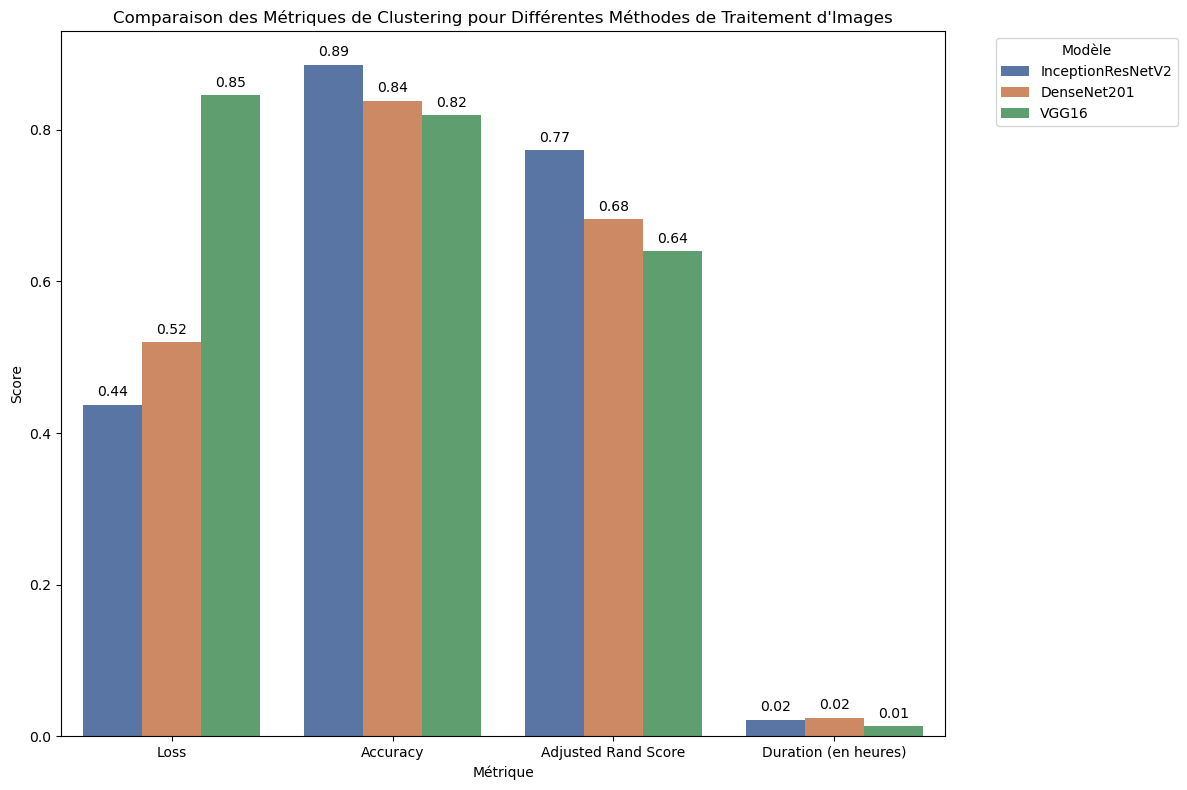

In [40]:
plot_model_performance(data_metrics)

# Optimisation

## Hyper paramètres

In [30]:
# Entraînement du modèle
best_model, duration_best = test_hyperparameters(model_inceptionresnetv2, X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2,
                                                 y_val, "./model_best.weights.h5")

Testing with learning_rate=0.01, batch_size=16, epochs=50
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.
Finished 0.01, 16, 50 with val_accuracy=0.8666666746139526, duration=145.67314219474792
Testing with learning_rate=0.01, batch_size=32, epochs=50
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.01, 32, 50 with val_accuracy=0.8761904835700989, duration=36.145219564437866
Testing with learning_rate=0.01, batch_size=64, epochs=50
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.
Finished 0.01, 64, 50 with val_accuracy=0.8809523582458496, duration=418.7864935398102
Testing with learning_rate=0.001, batch_size=16, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.001, 16, 50 with val_accuracy=0.8761904835700989, duration=74.55882549285889
Testing with learning_rate=0.001, batch_size=32, epochs=50
Epoch 5: early stopping

In [31]:
# Évaluation du modèle
loss_best, accuracy_best, ari_score_best = evaluate_model(best_model,
                                                          X_train_inceptionresnetv2,
                                                          y_train, X_val_inceptionresnetv2,
                                                          y_val, X_test_inceptionresnetv2,
                                                          y_test, best_weights_path="none")

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8824 - loss: 0.5482
Validation Accuracy (best): 0.8810
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8881 - loss: 0.6075
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Adjusted Rand Index (ARI): 0.7718


In [32]:
add_results('InceptionResNetV2(HP)', loss_best, accuracy_best, ari_score_best, duration_best)
data_metrics = pd.DataFrame(data_results)

In [33]:
data_metrics.head(15)

,Model,Metric,Score
0,VGG16,Loss,0.845897
1,VGG16,Accuracy,0.819048
2,VGG16,Adjusted Rand Score,0.639953
3,VGG16,Duration (en heures),0.013026
4,InceptionResNetV2,Loss,0.437405
5,InceptionResNetV2,Accuracy,0.885714
6,InceptionResNetV2,Adjusted Rand Score,0.772860
7,InceptionResNetV2,Duration (en heures),0.021887
8,DenseNet201,Loss,0.520032
9,DenseNet201,Accuracy,0.838095


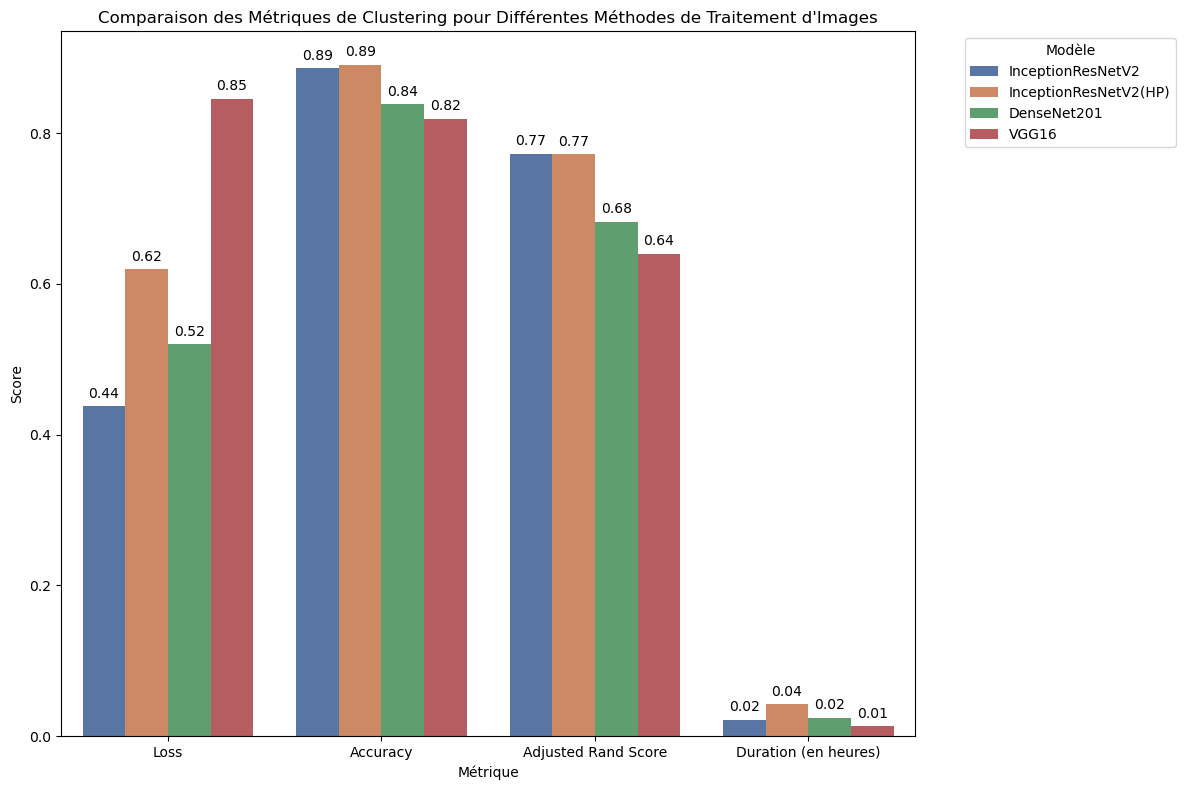

In [34]:
plot_model_performance(data_metrics)

## Data Augmentation